# Import libraries


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

# Method definition for outlier detection

In [13]:
#To observe outliers with boxplot
def outlier_bp(df, colname):
    column = df[colname]
    sns.boxplot(y=column)
    plt.show()

#To observe outliers with interquartile range
def outlier_iqr(df, colname):
    tmp = pd.DataFrame()
    first_quartile = np.percentile(df[colname], 25, method="midpoint")
    third_quartile = np.percentile(df[colname], 75, method="midpoint")
    iqr = third_quartile - first_quartile

    upper_bound = np.where(df[colname] >= third_quartile + 1.5 * iqr)
    lower_bound = np.where(df[colname] <= first_quartile - 1.5 * iqr)
    i = 0
    while i < len(upper_bound):
        tmp = pd.concat([tmp, df.loc[upper_bound[i]]])
        tmp = pd.concat([tmp, df.loc[lower_bound[i]]])
        i += 1
    display(tmp)

# Detecting outliers for numerical variables
Here the boxplot and interquartile range methods defined previously are used to identify any outliers for numeric variables. From the results generated, we can see that there are 8441 sets of values that do not fall within the range between the upper and lower boundaries for the "Age" variable, and so on. 

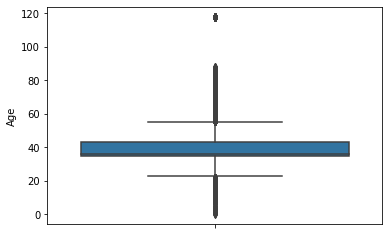

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
10,JZI,Airlines,Online,Basic Plan,No,33,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",-26.0,9.10,NaN,118
13,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,5,MALAYSIA,-39.6,23.76,NaN,64
17,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,11,UNITED STATES,-29.7,17.82,NaN,58
...,...,...,...,...,...,...,...,...,...,...,...
63211,C2B,Airlines,Online,Bronze Plan,No,56,SINGAPORE,86.5,21.63,F,1
63215,C2B,Airlines,Online,Silver Plan,No,7,SINGAPORE,22.5,5.63,M,16
63229,C2B,Airlines,Online,Annual Silver Plan,No,365,SINGAPORE,259.2,64.80,F,23
63273,EPX,Travel Agency,Online,Cancellation Plan,No,54,SINGAPORE,11.0,0.00,NaN,23


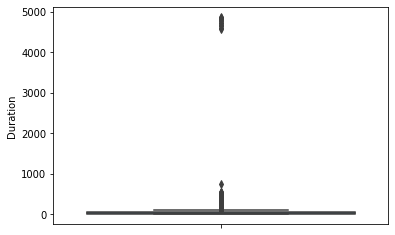

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.00,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.00,9.57,F,71
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.00,59.40,NaN,37
20,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,136,NORWAY,-108.90,65.34,NaN,32
24,C2B,Airlines,Online,Silver Plan,No,190,SINGAPORE,294.75,73.69,M,26
...,...,...,...,...,...,...,...,...,...,...,...
63252,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,121,THAILAND,20.00,0.00,NaN,59
63255,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,159,INDONESIA,20.00,0.00,NaN,42
63285,EPX,Travel Agency,Online,Cancellation Plan,No,146,PHILIPPINES,20.00,0.00,NaN,35
63286,EPX,Travel Agency,Online,Cancellation Plan,No,147,UNITED STATES,79.00,0.00,NaN,28


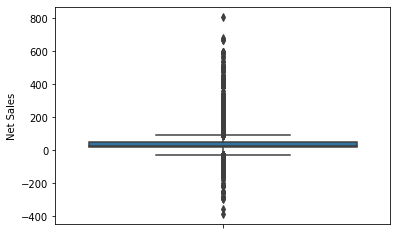

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
23,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,M,34
24,C2B,Airlines,Online,Silver Plan,No,190,SINGAPORE,294.75,73.69,M,26
25,C2B,Airlines,Online,Annual Silver Plan,No,364,SINGAPORE,389.00,97.25,F,30
44,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,36,UNITED STATES,95.00,0.00,NaN,49
130,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,26,UNITED STATES,148.50,89.10,NaN,40
...,...,...,...,...,...,...,...,...,...,...,...
57989,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,33,AUSTRALIA,-69.30,41.58,NaN,31
57990,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,40,ISRAEL,-69.30,41.58,NaN,38
57993,C2B,Airlines,Online,Annual Silver Plan,No,386,SINGAPORE,-161.00,40.25,F,28
57994,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,28,MALAYSIA,-29.70,17.82,NaN,31


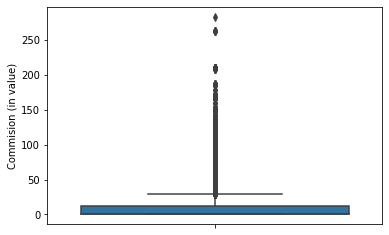

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,NaN,29
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.0,59.40,NaN,37
12,KML,Travel Agency,Online,Premier Plan,No,53,NORWAY,-130.0,49.40,F,48
...,...,...,...,...,...,...,...,...,...,...,...
63238,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,180,AUSTRALIA,79.2,47.52,NaN,31
63239,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,62,AUSTRALIA,99.0,59.40,NaN,54
63240,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,58,NEW ZEALAND,128.7,77.22,NaN,38
63241,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,154,AUSTRALIA,79.2,47.52,NaN,53


In [14]:
#Read excel file.
df = pd.read_excel("C:\\Users\\notth\\Documents\\MASA Hackathon\\Documentation & Materials\\TravelDataset.xlsx")

#Looking for outliers of age using boxplot and interquartile range.
outlier_bp(df, "Age")
outlier_iqr(df, "Age")

#Looking for outliers of duration.
outlier_bp(df, "Duration")
outlier_iqr(df, "Duration")

#Looking for outliers of net sales.
outlier_bp(df, "Net Sales")
outlier_iqr(df, "Net Sales")

#Looking for outliers of commission.
outlier_bp(df, "Commision (in value)")
outlier_iqr(df, "Commision (in value)")